In [1]:
from scipy.special import iv
import numpy as np
import timeit
import viscid
import imp
from scipy.linalg import eig
import matplotlib.pyplot as plt

In [2]:
#If you edit viscid while the kernel is running, run this to reload the package
imp.reload(viscid)

<module 'viscid' from '/Users/zack/Desktop/shaker_docs/faraday/viscid.py'>

In [3]:
args=viscid.args

In [4]:
num=50

start=timeit.default_timer()
ks=np.arange(1,num)/num*args.k2y/2
evalssweep1=[]
for k in ks:
    F,G=viscid.inviscid_mat(0,k)
    Fflattened=np.transpose(F[0,0],(0,2,1,3)).reshape(((2*args.Nx+1)*(2*args.Ny+1),(2*args.Nx+1)*(2*args.Ny+1)))
    Gflattened=np.transpose(G[0,0],(0,2,1,3)).reshape(((2*args.Nx+1)*(2*args.Ny+1),(2*args.Nx+1)*(2*args.Ny+1)))
    evals,evecs=eig(Fflattened,Gflattened)
    evalssweep1=evalssweep1+[evals]
stop=timeit.default_timer()
print(stop-start)

start=timeit.default_timer()
kxs2=args.k2x/2+np.arange(1,num)/num*((2*args.k2x + args.k1x)/3 - args.k2x/2)
kys2=args.k2y/2+np.arange(1,num)/num*((2*args.k2y + args.k1y)/3 - args.k2y/2)
evalssweep2=[]
for i in range(num-1):
    F,G=viscid.inviscid_mat(kxs2[i],kys2[i])
    Fflattened=np.transpose(F[0,0],(0,2,1,3)).reshape(((2*args.Nx+1)*(2*args.Ny+1),(2*args.Nx+1)*(2*args.Ny+1)))
    Gflattened=np.transpose(G[0,0],(0,2,1,3)).reshape(((2*args.Nx+1)*(2*args.Ny+1),(2*args.Nx+1)*(2*args.Ny+1)))
    evals,evecs=eig(Fflattened,Gflattened)
    evalssweep2=evalssweep2+[evals]
stop=timeit.default_timer()
print(stop-start)

start=timeit.default_timer()
kxs3=np.arange(1,num)/num*((2*args.k2x + args.k1x)/3)
kys3=np.arange(1,num)/num*((2*args.k2y + args.k1y)/3)
evalssweep3=[]
for i in range(num-1):
    F,G=viscid.inviscid_mat(kxs3[i],kys3[i])
    Fflattened=np.transpose(F[0,0],(0,2,1,3)).reshape(((2*args.Nx+1)*(2*args.Ny+1),(2*args.Nx+1)*(2*args.Ny+1)))
    Gflattened=np.transpose(G[0,0],(0,2,1,3)).reshape(((2*args.Nx+1)*(2*args.Ny+1),(2*args.Nx+1)*(2*args.Ny+1)))
    evals,evecs=eig(Fflattened,Gflattened)
    evalssweep3=evalssweep3+[evals]
stop=timeit.default_timer()
print(stop-start)

0.9835712800000005
1.0171138209999997
0.9846282679999998


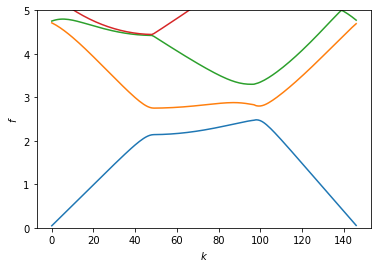

In [5]:
vals1=np.sort(np.abs(np.imag(np.array(evalssweep1)**0.5/(2*np.pi))),axis=1)
vals2=np.sort(np.abs(np.imag(np.array(evalssweep2)**0.5/(2*np.pi))),axis=1)
vals3=np.flip(np.sort(np.abs(np.imag(np.array(evalssweep3)**0.5/(2*np.pi))),axis=1),axis=0)

plt.ylim(0,5)
plt.plot(np.concatenate([vals1,vals2,vals3]))
plt.xlabel('$k$')
plt.ylabel('$f$')           
plt.show()

In [6]:
start=timeit.default_timer()

E=viscid.viscid_mat(2*np.pi*args.freq/2,0,args.k2y/2)
E.shape
flattened=np.transpose(E,(0,2,4,6,1,3,5,7)).reshape((3*(2*args.Nx+1)*(2*args.Ny+1)*(2*args.Nt+1),3*(2*args.Nx+1)*(2*args.Ny+1)*(2*args.Nt+1)))
print(flattened.shape)

stop=timeit.default_timer()
print(stop-start)

(3993, 3993)
0.721322219000001


In [8]:
F,G=viscid.inviscid_mat(0,args.k2y/2)
Fflattened=np.transpose(F[0,0],(0,2,1,3)).reshape(((2*args.Nx+1)*(2*args.Ny+1),(2*args.Nx+1)*(2*args.Ny+1)))
Gflattened=np.transpose(G[0,0],(0,2,1,3)).reshape(((2*args.Nx+1)*(2*args.Ny+1),(2*args.Nx+1)*(2*args.Ny+1)))
evals,levecs,revecs=eig(Fflattened,Gflattened,left=True)

print(np.linalg.norm(levecs[:,-1]@Fflattened-evals[-1]*levecs[:,-1]@Gflattened))
print(np.linalg.norm(Fflattened@revecs[:,-1]-evals[-1]*Gflattened@revecs[:,-1]))


v0=revecs[:,-1].reshape(((2*args.Nx+1),(2*args.Ny+1)))
w0=levecs[:,-1].reshape(((2*args.Nx+1),(2*args.Ny+1)))

print(np.linalg.norm(np.einsum("ijkl,kl",np.transpose(F[0,0],(0,2,1,3)),v0)-evals[-1]*np.einsum("ijkl,kl",np.transpose(G[0,0],(0,2,1,3)),v0)))
print(np.linalg.norm(np.einsum("ijkl,ij",np.transpose(F[0,0],(0,2,1,3)),w0)-evals[-1]*np.einsum("ijkl,ij",np.transpose(G[0,0],(0,2,1,3)),w0)))

4.775798900906629e-10
5.900170597225778e-10
5.942928415316502e-10
5.026518732544115e-10


In [72]:
imp.reload(viscid)

<module 'viscid' from '/Users/zack/Desktop/shaker_docs/faraday/viscid.py'>

In [106]:
from scipy.linalg import solve
from scipy.linalg import LinAlgWarning
import warnings
warnings.filterwarnings("error")

start=timeit.default_timer()

omega=2*np.pi*args.freq/2
qx=0
qy=args.k2y/2

Ftilde_0,Gtilde_0=viscid.viscid_flat_mat(omega,qx,qy)
Ftildeflattened_0=np.transpose(Ftilde_0,(0,2,1,3)).reshape((3*(2*args.Nt+1),3*(2*args.Nt+1)))
Gtildeflattened_0=np.transpose(Gtilde_0,(0,2,1,3)).reshape((3*(2*args.Nt+1),3*(2*args.Nt+1)))
evals,levecs,revecs=eig(Ftildeflattened_0,Gtildeflattened_0,left=True)
v0=revecs[:,~np.isinf(evals)][:,-1].reshape((3,(2*args.Nt+1)))
w0=np.conjugate(levecs[:,~np.isinf(evals)][:,-1].reshape((3,(2*args.Nt+1))))
e1=np.linalg.norm(np.einsum("kKlL,KL",Ftilde_0,v0)-evals[~np.isinf(evals)][-1]*np.einsum("kKlL,KL",Gtilde_0,v0))
e2=np.linalg.norm(np.einsum("kKlL,kl",Ftilde_0,w0)-evals[~np.isinf(evals)][-1]*np.einsum("kKlL,kl",Gtilde_0,w0))
print(e1,e2,(np.einsum("kKlL,KL,kl",Ftilde_0,v0,w0)/np.einsum("kKlL,KL,kl",Gtilde_0,v0,w0)))

Ftilde,Gtilde=viscid.viscid_mat2(omega,qx,qy)

v=np.zeros((3,(2*args.Nt+1),(2*args.Nx+1),(2*args.Ny+1)),dtype=np.complex128)
w=np.zeros((3,(2*args.Nt+1),(2*args.Nx+1),(2*args.Ny+1)),dtype=np.complex128)
v[:,:,args.Nx,args.Ny]=v0
w[:,:,args.Nx,args.Ny]=w0

for i in range(10):
    lam=(np.einsum("kKlLmMnN,KLMN,klmn",Ftilde,v,w)/np.einsum("kKlLmMnN,KLMN,klmn",Gtilde,v,w))
    flat=np.transpose(lam*Gtilde-Ftilde,(0,2,4,6,1,3,5,7)).reshape((3*(2*args.Nt+1)*(2*args.Nx+1)*(2*args.Ny+1),3*(2*args.Nt+1)*(2*args.Nx+1)*(2*args.Ny+1)))
    try:
        xi=solve(flat, np.einsum("kKlLmMnN,KLMN",Gtilde,v).reshape(3*(2*args.Nt+1)*(2*args.Nx+1)*(2*args.Ny+1))).reshape(3,(2*args.Nt+1),(2*args.Nx+1),(2*args.Ny+1))
        zeta=solve(flat.T, np.einsum("kKlLmMnN,klmn",Gtilde,w).reshape(3*(2*args.Nt+1)*(2*args.Nx+1)*(2*args.Ny+1))).reshape(3,(2*args.Nt+1),(2*args.Nx+1),(2*args.Ny+1))
        v=xi/np.linalg.norm(xi)
        w=zeta/np.linalg.norm(zeta)
    except LinAlgWarning:
        print('convergence')
        lam=(np.einsum("kKlLmMnN,KLMN,klmn",Ftilde,v,w)/np.einsum("kKlLmMnN,KLMN,klmn",Gtilde,v,w))
        e1=np.linalg.norm(np.einsum("kKlLmMnN,KLMN",Ftilde,v)-lam*np.einsum("kKlLmMnN,KLMN",Gtilde,v))
        e2=np.linalg.norm(np.einsum("kKlLmMnN,klmn",Ftilde,w)-lam*np.einsum("kKlLmMnN,klmn",Gtilde,w))
        print(e1,e2,lam,flush=True)
        break

    e1=np.linalg.norm(np.einsum("kKlLmMnN,KLMN",Ftilde,v)-lam*np.einsum("kKlLmMnN,KLMN",Gtilde,v))
    e2=np.linalg.norm(np.einsum("kKlLmMnN,klmn",Ftilde,w)-lam*np.einsum("kKlLmMnN,klmn",Gtilde,w))
    print(e1,e2,lam,flush=True)
stop=timeit.default_timer()
print(stop-start)

6.003311294712343e-14 7.994566015206853e-16 (-379.5516364617741-1.3965181874614943e-14j)
0.6905813537077017 0.007284396086445061 (-379.5516364617748-1.0139337100179614e-12j)
0.036334683927481626 0.0004866964128750897 (-322.0728046340976-2.914567365180013e-10j)
1.94137010885658e-06 2.6145421182725768e-08 (-317.52049780356293-1.1281003611045982e-12j)
convergence
1.0660017518785793e-09 2.2405498810042063e-11 (-317.5202532948746-2.4927697814749852e-12j)
17.192296468999302


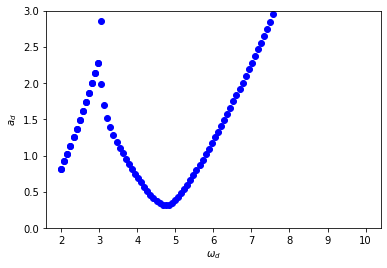

In [172]:
qx=0
qy=args.k2y/2
omega=2*np.pi*args.freq/2

evalssweep=[]
omegas=np.linspace(2*np.pi*2, 2*np.pi*10, 100)
for omega in omegas:
    viscid.args.freq=omega/(2*np.pi)
    Ftilde_0,Gtilde_0=viscid.viscid_flat_mat(omega/2,qx,qy)
    Ftildeflattened_0=np.transpose(Ftilde_0,(0,2,1,3)).reshape((3*(2*args.Nt+1),3*(2*args.Nt+1)))
    Gtildeflattened_0=np.transpose(Gtilde_0,(0,2,1,3)).reshape((3*(2*args.Nt+1),3*(2*args.Nt+1)))
    evals,levecs,revecs=eig(Ftildeflattened_0,Gtildeflattened_0,left=True)
    evalssweep=evalssweep+[evals]
plt.plot(omegas/(2*np.pi),np.real(evalssweep)/args.g,'bo')
plt.ylim(0,3)
plt.xlabel(r'$\omega_d$')
plt.ylabel('$a_d$')
plt.show()